In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import swifter
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from AdvancedAlgosPascalle import *
from graphviz import Graph

{'ed': 5.0, 'alignment': array([], shape=(0, 2), dtype=float64)}


Import dataset<br>
Sample dataset<br>
Compute ed of sample<br>
???<br>
Profit<br>

<br>
#### TODO
Count time run stuff

In [4]:
#Import dataset
protein_path = 'protein'
protein_file = 'export_1603716401.csv'

protein_dataset = pd.read_csv(protein_path+'/'+protein_file)

protein_dataset.head()

,name,length,group,protein
0,1GME_A,151,1,MSIVRRSNVFDPFADLWADPFDTFRSIVPAISGGGSETAAFANARM...
1,1ONS_A,282,20,TVQTSKNPQVDIAEDNAFFPSEYSLSQYTSPVSDLDGVDYPKPYRG...
2,1TVG_A,153,16,MGHHHHHHSHMRKIDLCLSSEGSEVILATSSDEKHPPENIIDGNPE...
3,2N3JB,98,99,MQLSSGVSEIRHTADRWRVSLDVNHFAPDELTVKTKDGVVEITGKH...
4,2WJ5A,101,99,GAMAQVPTDPGYFSVLLDVKHFSPEEISVKVVGDHVEVHARHEERP...


In [ ]:
protein_dataset[['name','protein','group']].describe()

In [ ]:
protein_dataset['group'].describe()

In [ ]:
#Sampling dataset
X_train, X_test, y_train, y_test = train_test_split(
    protein_dataset[['name','protein','group']],
    protein_dataset['group'],
    test_size=0.01,
    random_state=4269,
    stratify=protein_dataset['group']
    )

X_test.head()

In [ ]:
#Cartesian product
pair_proteins = X_test.copy()
pair_proteins['key'] = 0

pair_proteins = pair_proteins.merge(pair_proteins, on='key', suffixes={'_1','_2'})

#Drop equal pairs
pair_proteins = pair_proteins[pair_proteins['name_1'] != pair_proteins['name_2']]

pair_proteins.head()

In [ ]:
pair_proteins.describe()

In [ ]:
#Calculating ed
pair_proteins['ed'] = pair_proteins.apply(lambda row: editDistanceDP(row['protein_1'],row['protein_2']), axis=1)

In [ ]:
pair_proteins['edit_distance'] = pair_proteins['ed'].apply(lambda x: x['ed'])

pair_proteins.head()

In [ ]:
pair_proteins['edit_distance'].value_counts(ascending=True)

In [ ]:
pair_proteins.to_csv(protein_path+'/'+'pair_proteins.csv',index=False)

In [5]:
pair_proteins = pd.read_csv(protein_path+'/'+'pair_proteins.csv')

In [ ]:
prot_a = 'MSIIPSFFTGNGSNIFDPFSSEIWDPFQGLSSVINNLPESSRETTAIANTRIDWKETPEAHVFKADLPGLKKEEVKVEVEEGRVLQISGERSRENVEKNDKWHRMERSSGKFLRRFRLPENAKMDQVKAAMENGVLTVTVPKAEVKKPEVKAIDIS'
prot_b = 'MSLIPSFFGGRRTNVFDPFSLDLYDPFEGFLTPSGMTNATSKDVAAFTNAKVDWRETPEAHVFKADLPGLKKEEVKVEVEDGNILQISGERSSENEEKSDRWHRVERSSGKFMRRFKLPENAKVDEVKASMENGVLSVTVPKMAERKPEVKSIDISG'
prot_c = 'MNTLTKENHGNVSETVEGKDQKLTTRVYSPNVDVLETEETIQFFVEMPGVDQTSVDISIEKDQLILEGKFVSSEESRGQVRLAEYREGNYYRKFTIGKAIHSDKATAKMKNGILELTIPKMEPKKTKIEIQK'
editDistanceDP(prot_a,prot_c)

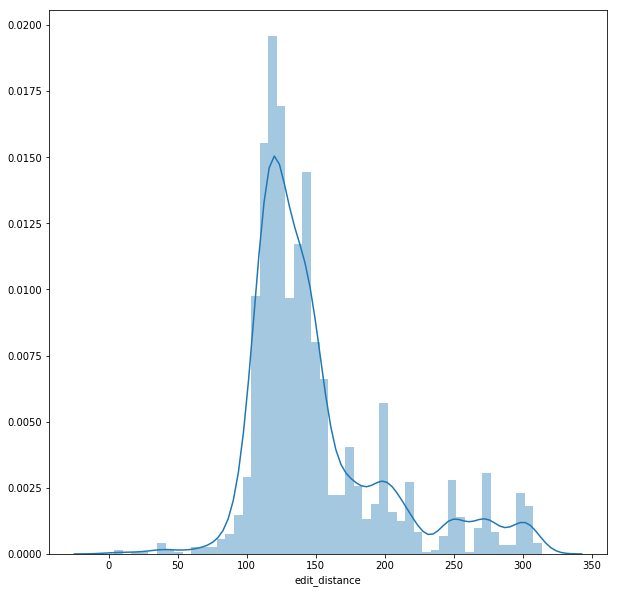

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

sns.distplot(a=pair_proteins['edit_distance'], ax=ax)
#75 will be the cut
plt.show()

In [ ]:
#Set data as a weighted acyclic graph
#Analyse all of the ed and 'cut' connections over x value

#Run BFS and generate list of graphs
#Profit???

In [9]:
graph_info = pair_proteins[['name_1','name_2','edit_distance']]
graph_info = graph_info.copy()

graph_info = graph_info[graph_info['edit_distance'] <= 75]

graph_info.head()

,name_1,name_2,edit_distance
1,YP_003139127,WP_002761262,43.0
124,WP_002761262,YP_003139127,43.0
283,WP_060084673,WP_059524269,8.0
321,KYZ73633,EHW06272,20.0
602,EJA97862,ZP_11129104,66.0


In [58]:
nodes = []
edges = {}


#Get connections of the node
for index, row in graph_info.iterrows():
    if row['name_1'] in edges:
        edges[row['name_1']] = edges[row['name_1']]+[row['name_2']]
    else:
        edges[row['name_1']] = [row['name_2']]

    if row['name_1'] not in nodes:
        nodes.append(row['name_1'])
    if row['name_2'] not in nodes:
        nodes.append(row['name_2'])

graph = Graph('Proteins')
for key in edges.keys():
    a = key
    for b in edges[key]:
        graph.edge(a,b)

    
print(graph)

graph Proteins {
	YP_003139127 -- WP_002761262
	WP_002761262 -- YP_003139127
	WP_060084673 -- WP_059524269
	KYZ73633 -- EHW06272
	EJA97862 -- ZP_11129104
	ZP_10674128 -- ZP_06493705
	ZP_10674128 -- WP_046051843
	ZP_10674128 -- YP_003743577
	EHW06272 -- KYZ73633
	XP_008384896 -- XP_012441135
	XP_008384896 -- KCW52609
	XP_008384896 -- ACE60625
	ZP_11157398 -- CCQ74065
	ZP_06493705 -- ZP_10674128
	ZP_06493705 -- WP_046051843
	ZP_06493705 -- YP_003743577
	XP_012441135 -- XP_008384896
	XP_012441135 -- KCW52609
	XP_012441135 -- ACE60625
	WP_046051843 -- ZP_10674128
	WP_046051843 -- ZP_06493705
	WP_046051843 -- YP_003743577
	CCQ74065 -- ZP_11157398
	CCQ74065 -- ZP_11250046
	ESF85942 -- ESC23015
	KCW52609 -- XP_008384896
	KCW52609 -- XP_012441135
	KCW52609 -- ACE60625
	WP_059524269 -- WP_060084673
	ACE60625 -- XP_008384896
	ACE60625 -- XP_012441135
	ACE60625 -- KCW52609
	ZP_11129104 -- EJA97862
	ZP_11250046 -- CCQ74065
	YP_003743577 -- ZP_10674128
	YP_003743577 -- ZP_06493705
	YP_003743577 -- 

In [49]:
print(edges)
print()
print(nodes)

{'YP_003139127': ['WP_002761262'], 'WP_002761262': ['YP_003139127'], 'WP_060084673': ['WP_059524269'], 'KYZ73633': ['EHW06272'], 'EJA97862': ['ZP_11129104'], 'ZP_10674128': ['ZP_06493705', 'WP_046051843', 'YP_003743577'], 'EHW06272': ['KYZ73633'], 'XP_008384896': ['XP_012441135', 'KCW52609', 'ACE60625'], 'ZP_11157398': ['CCQ74065'], 'ZP_06493705': ['ZP_10674128', 'WP_046051843', 'YP_003743577'], 'XP_012441135': ['XP_008384896', 'KCW52609', 'ACE60625'], 'WP_046051843': ['ZP_10674128', 'ZP_06493705', 'YP_003743577'], 'CCQ74065': ['ZP_11157398', 'ZP_11250046'], 'ESF85942': ['ESC23015'], 'KCW52609': ['XP_008384896', 'XP_012441135', 'ACE60625'], 'WP_059524269': ['WP_060084673'], 'ACE60625': ['XP_008384896', 'XP_012441135', 'KCW52609'], 'ZP_11129104': ['EJA97862'], 'ZP_11250046': ['CCQ74065'], 'YP_003743577': ['ZP_10674128', 'ZP_06493705', 'WP_046051843'], 'ESC23015': ['ESF85942'], 'WP_052865406': ['WP_050373900'], 'WP_050373900': ['WP_052865406']}

['YP_003139127', 'WP_002761262', 'WP_06008

In [54]:
#Original graph
edges
nodes

graphs = []

while len(nodes) > 0:    
    #List of visited edges
    visited = []
    #List of edges to visit
    to_visit = [nodes.pop()]
    while len(to_visit) > 0:
        current = to_visit.pop()
        if current not in visited:
            visited.append(current)
        if current in nodes:
            nodes.remove(current)
        for con_node in edges[current]:
            if con_node not in visited:
                to_visit.append(con_node)
    graphs.append(visited)
    
print(graphs)

[['WP_050373900', 'WP_052865406'], ['ESC23015', 'ESF85942'], ['ZP_11250046', 'CCQ74065', 'ZP_11157398'], ['ACE60625', 'KCW52609', 'XP_012441135', 'XP_008384896'], ['YP_003743577', 'WP_046051843', 'ZP_06493705', 'ZP_10674128'], ['ZP_11129104', 'EJA97862'], ['EHW06272', 'KYZ73633'], ['WP_059524269', 'WP_060084673'], ['WP_002761262', 'YP_003139127']]


In [55]:
graphs_list = []
i=0
for node_list in graphs:
    graph = Graph('Graph_'+str(i))
    i += 1
    for node in node_list:
        for other_node in edges[node]:
            graph.edge(node,other_node)
    graphs_list.append(graph)

In [56]:
for graph in graphs_list:
    print(graph)

graph Graph_0 {
	WP_050373900 -- WP_052865406
	WP_052865406 -- WP_050373900
}
graph Graph_1 {
	ESC23015 -- ESF85942
	ESF85942 -- ESC23015
}
graph Graph_2 {
	ZP_11250046 -- CCQ74065
	CCQ74065 -- ZP_11157398
	CCQ74065 -- ZP_11250046
	ZP_11157398 -- CCQ74065
}
graph Graph_3 {
	ACE60625 -- XP_008384896
	ACE60625 -- XP_012441135
	ACE60625 -- KCW52609
	KCW52609 -- XP_008384896
	KCW52609 -- XP_012441135
	KCW52609 -- ACE60625
	XP_012441135 -- XP_008384896
	XP_012441135 -- KCW52609
	XP_012441135 -- ACE60625
	XP_008384896 -- XP_012441135
	XP_008384896 -- KCW52609
	XP_008384896 -- ACE60625
}
graph Graph_4 {
	YP_003743577 -- ZP_10674128
	YP_003743577 -- ZP_06493705
	YP_003743577 -- WP_046051843
	WP_046051843 -- ZP_10674128
	WP_046051843 -- ZP_06493705
	WP_046051843 -- YP_003743577
	ZP_06493705 -- ZP_10674128
	ZP_06493705 -- WP_046051843
	ZP_06493705 -- YP_003743577
	ZP_10674128 -- ZP_06493705
	ZP_10674128 -- WP_046051843
	ZP_10674128 -- YP_003743577
}
graph Graph_5 {
	ZP_11129104 -- EJA97862
	EJA9